# LetsGrowMore.

# Name: Ashish Mahendra Yadav

# Data Science.

## TASK 1 Iris Flowers Classification ML Project (BEGINNER LEVEL TASK)




# IMPORT

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn import datasets, model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set()

In [2]:
plt.rcParams['figure.figsize'] = (15, 9)

# DATASET

In [3]:
data = datasets.load_iris()

In [4]:
X = data['data']
y = data['target']
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [5]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8, random_state=15)

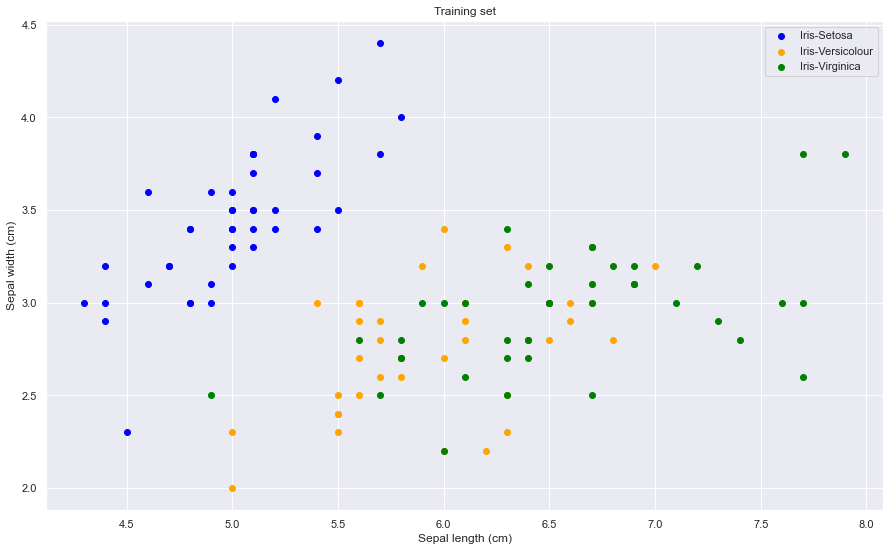

In [6]:
# Plot the training data

labels = {0: 'Iris-Setosa', 1: 'Iris-Versicolour', 2: 'Iris-Virginica'}
label_colours = ['blue', 'orange', 'green']

def plot_data(x, y, labels, colours, a=0, b=1, title='Training set'):
    for c in np.unique(y):
        inx = np.where(y == c)
        plt.scatter(x[inx, a], x[inx, b], label=labels[c], c=colours[c])
    plt.title(title)
    plt.xlabel("Sepal length (cm)")
    plt.ylabel("Sepal width (cm)")
    plt.legend()
    
plt.figure(figsize=(15, 9))
plot_data(X_train, y_train, labels, label_colours)
plt.show()

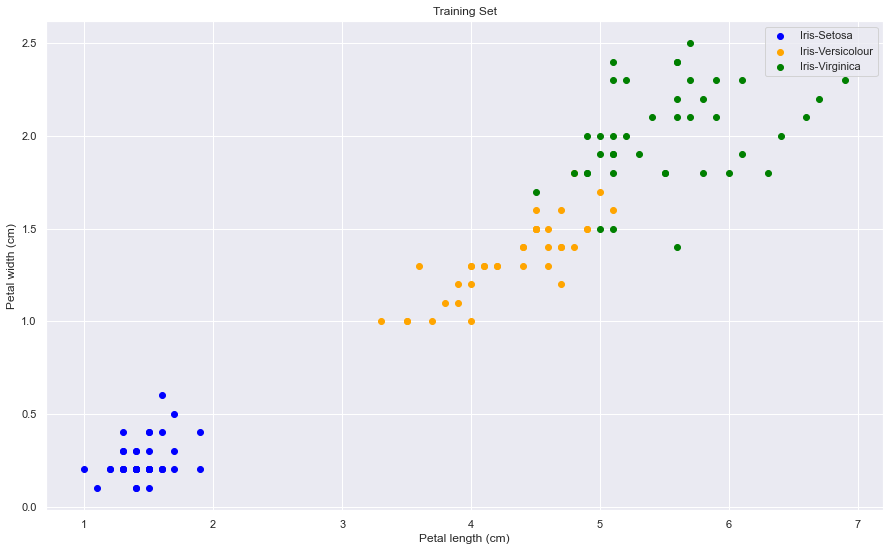

In [7]:
# Plot the training data

labels = {0: 'Iris-Setosa', 1: 'Iris-Versicolour', 2: 'Iris-Virginica'}
label_colours = ['blue', 'orange', 'green']
    
plt.figure(figsize=(15, 9))
#plot_data(X_train, y_train, labels, label_colours, a=2, b=3)
for c in np.unique(y_train):
        inx = np.where(y_train == c)
        plt.scatter(X_train[inx, 2], X_train[inx, 3], label=labels[c], c=label_colours[c])
plt.title("Training Set")
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.legend()
plt.show()

# TRAINING ON FULL DATASET

In [8]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
tf.keras.backend.clear_session()
mlp = Sequential([
    Dense(3, input_shape=(4,), activation='softmax')
])

mlp.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = mlp.fit(X_train, y_train, validation_split=0.1, batch_size=16, epochs=1000, verbose=0)

In [11]:
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.888353,0.657407,1.334731,0.416667
1,0.872613,0.648148,1.307699,0.416667
2,0.856735,0.648148,1.280457,0.416667
3,0.840922,0.648148,1.255653,0.416667
4,0.826565,0.638889,1.230232,0.416667


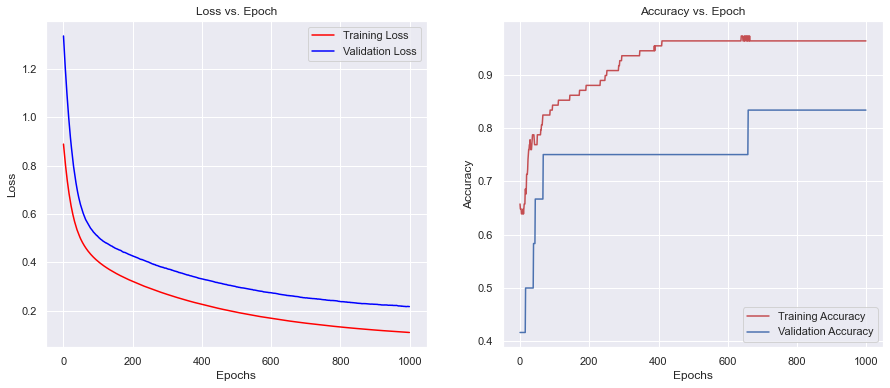

In [12]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt.plot(df['loss'], c='red', label='Training Loss')
plt.plot(df['val_loss'], c='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df['accuracy'], c='r', label='Training Accuracy')
plt.plot(df['val_accuracy'], c='b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()

plt.show()

In [13]:
mlp.evaluate(X_train, y_train)

4/4 [==============================] - 0s 2ms/step - loss: 0.1214 - accuracy: 0.9500


[0.12136264145374298, 0.949999988079071]

In [14]:
print(f'Test Accuracy: { mlp.evaluate(X_test, y_test)[1]:.2%}')

1/1 [==============================] - 0s 56ms/step - loss: 0.0932 - accuracy: 1.0000
Test Accuracy: 100.00%


# DATASET (SEPAL)

In [15]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X[:,:2], y, train_size=0.8, random_state=15)

# Feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

In [16]:
x_train.shape

(120, 2)

# ARTIFICIAL NEURAL NETWORK

In [17]:
tf.keras.backend.clear_session()
classifier = Sequential([
    Dense(5, input_shape=(2,), activation = 'relu'),
    Dense(3, activation='softmax')
])

classifier.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 18        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = classifier.fit(x_train, y_train, validation_split=0.1, batch_size=16, epochs=1000, verbose=0)

In [19]:
df = pd.DataFrame(history.history)
df.tail()

,loss,accuracy,val_loss,val_accuracy
995,0.368249,0.796296,0.290822,0.916667
996,0.368182,0.796296,0.291414,0.916667
997,0.368161,0.796296,0.290926,0.916667
998,0.368190,0.796296,0.291835,0.916667
999,0.368107,0.796296,0.291678,0.916667


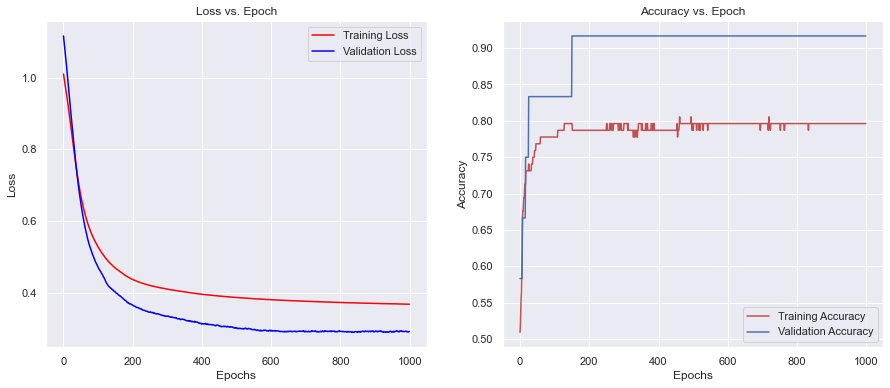

In [20]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
plt.plot(df['loss'], c='red', label='Training Loss')
plt.plot(df['val_loss'], c='blue', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(df['accuracy'], c='r', label='Training Accuracy')
plt.plot(df['val_accuracy'], c='b', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epoch')
plt.legend()

plt.show()

In [21]:
classifier.evaluate(x_train, y_train)

4/4 [==============================] - 0s 2ms/step - loss: 0.3604 - accuracy: 0.8083


[0.3603682518005371, 0.8083333373069763]

In [22]:
print(f'Test Accuracy: {classifier.evaluate(x_test, y_test)[1]:.2%}')

1/1 [==============================] - 0s 23ms/step - loss: 0.4220 - accuracy: 0.7667
Test Accuracy: 76.67%


<AxesSubplot:>

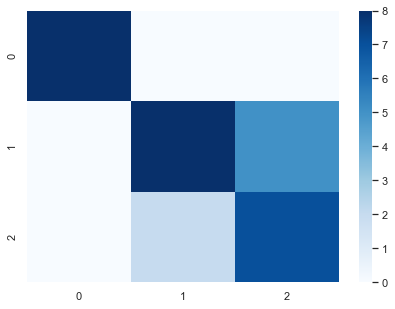

In [23]:
# evaluate using confusion matrix

y_pred = np.argmax(classifier.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, cmap='Blues')

In [24]:
def get_meshgrid(x0_range, x1_range, num_points=100):
    x0 = np.linspace(x0_range[0], x0_range[1], num_points)
    x1 = np.linspace(x1_range[0], x1_range[1], num_points)
    
    return np.meshgrid(x0, x1)

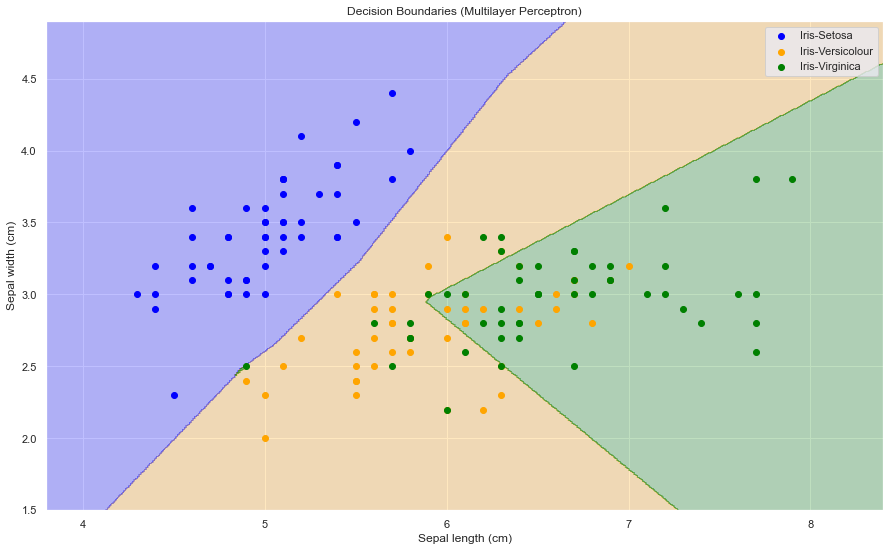

In [25]:
# Visualize

num_points = 500
x_mesh, y_mesh = get_meshgrid([X[:, 0].min() - 0.5, X[:, 0].max() + 0.5],
                             [X[:, 1].min() - 0.5, X[:, 1].max() + 0.5], num_points=num_points)
y_pred = np.argmax(classifier.predict(scaler.transform(np.array([x_mesh.ravel(), y_mesh.ravel()]).T)), axis=1).reshape((num_points, num_points))

plt.contourf(x_mesh, y_mesh, y_pred, cmap=ListedColormap(label_colours), alpha=0.25)
plot_data(X, y, labels, label_colours, title='Decision Boundaries (Multilayer Perceptron)')
plt.show()

# LOGISTIC REGRESSION

In [26]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [27]:
# result test
y_pred = classifier.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 1, 0,
       2, 1, 0, 0, 2, 2, 2, 1])

Test Accuracy:  90.00%


<AxesSubplot:>

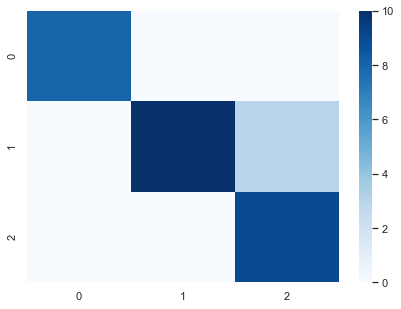

In [28]:
# evaluate using confusion matrix
cm = confusion_matrix(y_test, y_pred )
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal / len(y_test)
print(f'Test Accuracy: {Accuracy: .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm, cmap='Blues')

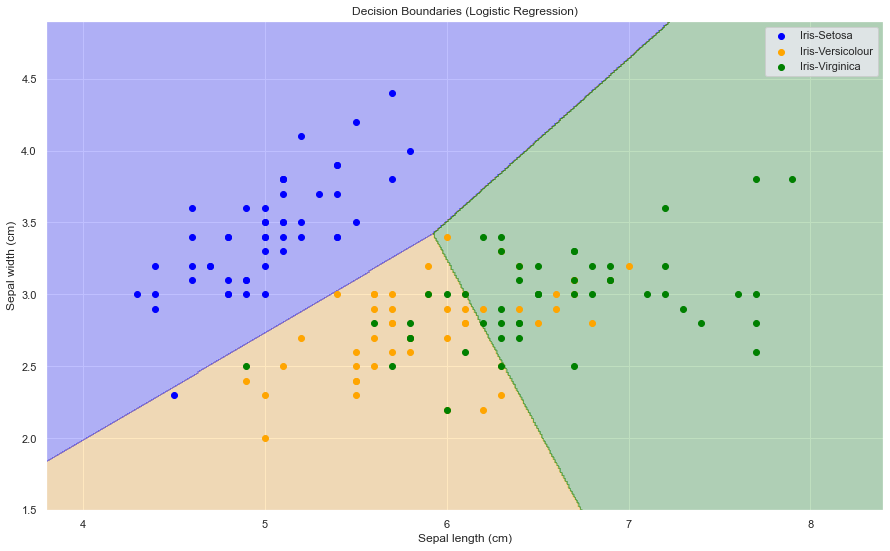

In [29]:
# Visualize

num_points = 500
x_mesh, y_mesh = get_meshgrid([X[:, 0].min() - 0.5, X[:, 0].max() + 0.5],
                             [X[:, 1].min() - 0.5, X[:, 1].max() + 0.5], num_points=num_points)
y_pred = classifier.predict(scaler.transform(np.array([x_mesh.ravel(), y_mesh.ravel()]).T)).reshape((num_points, num_points))

plt.contourf(x_mesh, y_mesh, y_pred, cmap=ListedColormap(label_colours), alpha=0.25)
plot_data(X, y, labels, label_colours, title='Decision Boundaries (Logistic Regression)')
plt.show()

# NAIVE BAYES

In [30]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [31]:
y_pred = classifier.predict(x_test)

Test Accuracy:  90.00%


<AxesSubplot:>

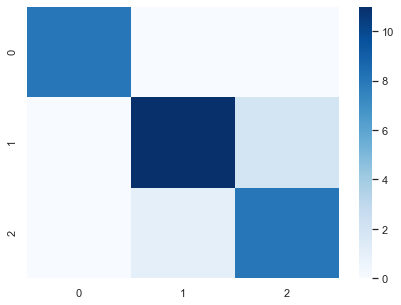

In [32]:
cm = confusion_matrix(y_test, y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal / len(y_test)
print(f'Test Accuracy: {Accuracy: .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm, cmap='Blues')

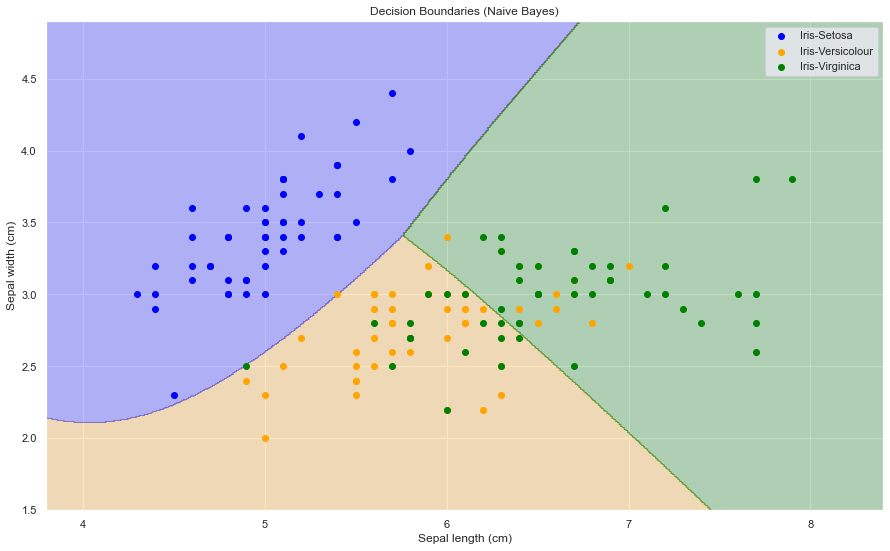

In [33]:
# Visualize

num_points = 500
x_mesh, y_mesh = get_meshgrid([X[:, 0].min() - 0.5, X[:, 0].max() + 0.5],
                             [X[:, 1].min() - 0.5, X[:, 1].max() + 0.5], num_points=num_points)
y_pred = classifier.predict(scaler.transform(np.array([x_mesh.ravel(), y_mesh.ravel()]).T)).reshape((num_points, num_points))

plt.contourf(x_mesh, y_mesh, y_pred, cmap=ListedColormap(label_colours), alpha=0.25)
plot_data(X, y, labels, label_colours, title='Decision Boundaries (Naive Bayes)')
plt.show()

# SUPPORT VECTOR MACHINE

In [34]:
# 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'

In [35]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [36]:
y_pred = classifier.predict(x_test)

Test Accuracy:  86.67%


<AxesSubplot:>

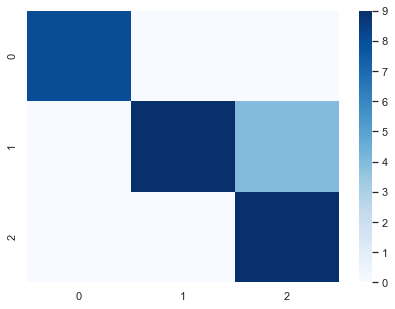

In [37]:
cm = confusion_matrix(y_test, y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal / len(y_test)
print(f'Test Accuracy: {Accuracy: .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm, cmap='Blues')

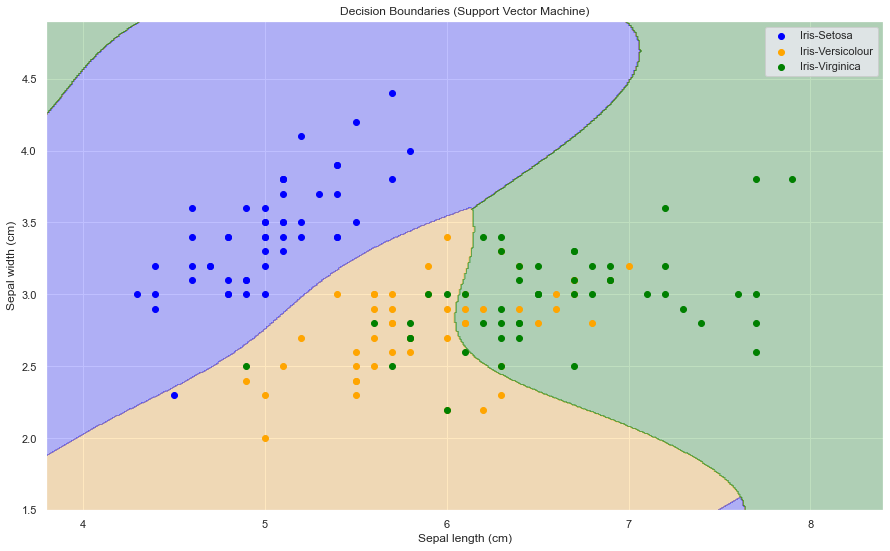

In [38]:
# Visualize

num_points = 500
x_mesh, y_mesh = get_meshgrid([X[:, 0].min() - 0.5, X[:, 0].max() + 0.5],
                             [X[:, 1].min() - 0.5, X[:, 1].max() + 0.5], num_points=num_points)
y_pred = classifier.predict(scaler.transform(np.array([x_mesh.ravel(), y_mesh.ravel()]).T)).reshape((num_points, num_points))

plt.contourf(x_mesh, y_mesh, y_pred, cmap=ListedColormap(label_colours), alpha=0.25)
plot_data(X, y, labels, label_colours, title='Decision Boundaries (Support Vector Machine)')
plt.show()

# K-NEAREST NEIGHBORS

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred = classifier.predict(x_test)

Test Accuracy:  70.00%


<AxesSubplot:>

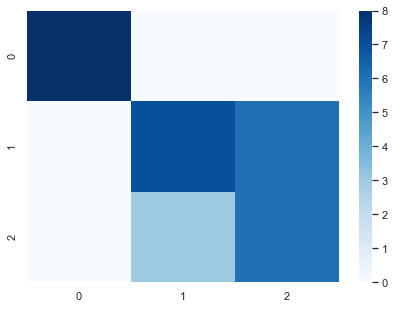

In [41]:
cm = confusion_matrix(y_test, y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal / len(y_test)
print(f'Test Accuracy: {Accuracy: .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm, cmap='Blues')

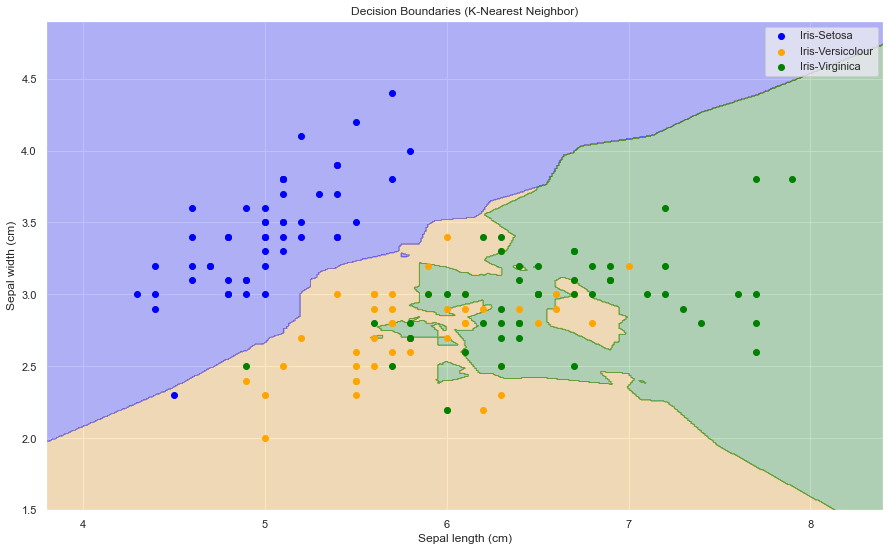

In [42]:
# Visualize

num_points = 500
x_mesh, y_mesh = get_meshgrid([X[:, 0].min() - 0.5, X[:, 0].max() + 0.5],
                             [X[:, 1].min() - 0.5, X[:, 1].max() + 0.5], num_points=num_points)
y_pred = classifier.predict(scaler.transform(np.array([x_mesh.ravel(), y_mesh.ravel()]).T)).reshape((num_points, num_points))

plt.contourf(x_mesh, y_mesh, y_pred, cmap=ListedColormap(label_colours), alpha=0.25)
plot_data(X, y, labels, label_colours, title='Decision Boundaries (K-Nearest Neighbor)')
plt.show()

# RANDOM FOREST

In [43]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [44]:
y_pred = classifier.predict(x_test)

Test Accuracy:  76.67%


<AxesSubplot:>

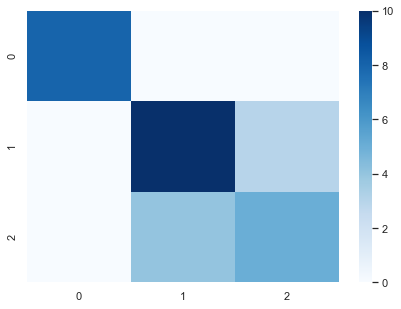

In [45]:
cm = confusion_matrix(y_test, y_pred)
diagonal = np.sum(np.diagonal(cm))
Accuracy = diagonal / len(y_test)
print(f'Test Accuracy: {Accuracy: .2%}')
plt.figure(figsize=(7,5))
sns.heatmap(cm, cmap='Blues')

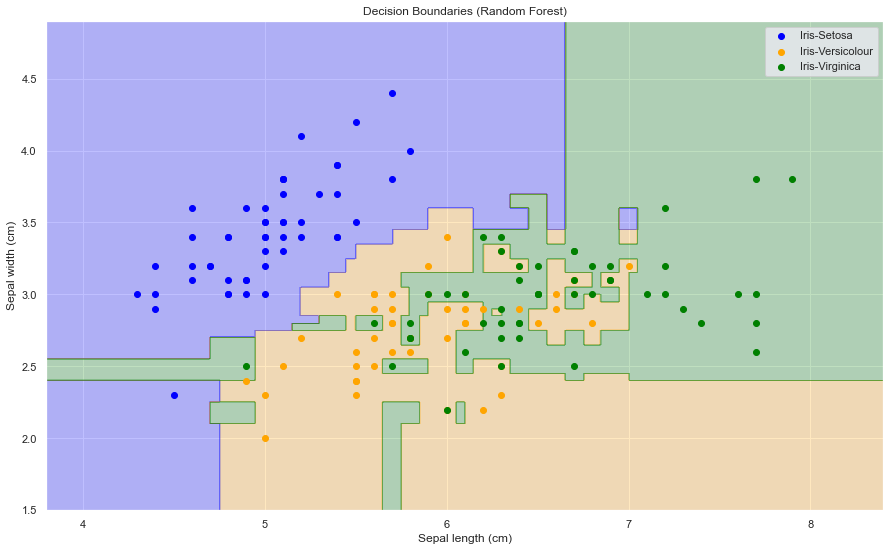

In [46]:
# Visualize

num_points = 500
x_mesh, y_mesh = get_meshgrid([X[:, 0].min() - 0.5, X[:, 0].max() + 0.5],
                             [X[:, 1].min() - 0.5, X[:, 1].max() + 0.5], num_points=num_points)
y_pred = classifier.predict(scaler.transform(np.array([x_mesh.ravel(), y_mesh.ravel()]).T)).reshape((num_points, num_points))

plt.contourf(x_mesh, y_mesh, y_pred, cmap=ListedColormap(label_colours), alpha=0.25)
plot_data(X, y, labels, label_colours, title='Decision Boundaries (Random Forest)')
plt.show()